# Amazon Reviewer Classifier: NLP Project

This project classifies Amazon customer reviews to identify which of two reviewers (**Outdoor Enthusiast** or **Ronny Acosta**) wrote a given review. It uses **Naive Bayes** classification with **TF-IDF** and **Bag of Words** NLP techniques to process review text. The dataset contains **495 reviews** from a CSV file with `reviewer` (label) and `review` (text) columns.

**Why This Project?**  
- Demonstrates core NLP skills: text preprocessing, feature extraction, and classification.  
- Achieve4 **~92% accuracy** on a test set, showcasing effective modeling.  
- Suitable for beginners learning NLP or building a data science portfolio.

**Project Structure**:  
1. **Exploratory Data Analysis (EDA)**: Visualizes reviewer distribution and review lengths to understand the data.  
2. **Text Preprocessing and Vectorization**: Cleans text (removes numbers, punctuation, stopwords) and applies Bag of Words and TF-IDF.  
3. **Model Building and Evaluation**: Trains a Naive Bayes classifier and evaluates performance with accuracy, precision, recall, and confusion matrix.

**How to Use**:  
- Run in **Google Colab** or Jupyter with `Amazon_Customdue to privacy).  
- Requires libraries: `pandas`, `numpy`, `scikit-learn`, `nltk`, `matplotlib`, `seaborn`.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Amazon Customer Reviews.csv")

**--EDA--**

In [5]:
df.head()

,reviewer,review
0,Outdoor Enthusiast,A bag helps with carrying the Outland Firebowl...
1,Outdoor Enthusiast,"A bit over 3 years ago, I purchased the 50' Fo..."
2,Outdoor Enthusiast,After having tried the Blackberry Bellini and ...
3,Ronny Acosta,"After overplucking and waxing, I bought this t..."
4,Ronny Acosta,After using this during a very cold hiking tri...


In [8]:
#Creating a new length column for further analysis
df["length"] = df["review"].apply(len)

In [7]:
df.head()

,reviewer,review,length
0,Outdoor Enthusiast,A bag helps with carrying the Outland Firebowl...,515
1,Outdoor Enthusiast,"A bit over 3 years ago, I purchased the 50' Fo...",701
2,Outdoor Enthusiast,After having tried the Blackberry Bellini and ...,546
3,Ronny Acosta,"After overplucking and waxing, I bought this t...",1375
4,Ronny Acosta,After using this during a very cold hiking tri...,798


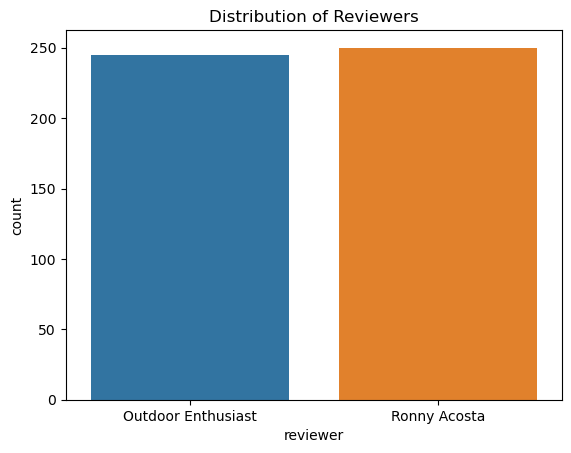

In [12]:
#Visualize reviewer distribution
sns.countplot(x="reviewer", data=df)
plt.title('Distribution of Reviewers')
plt.show()

The data set is well balanced between two data points which is good for model building.

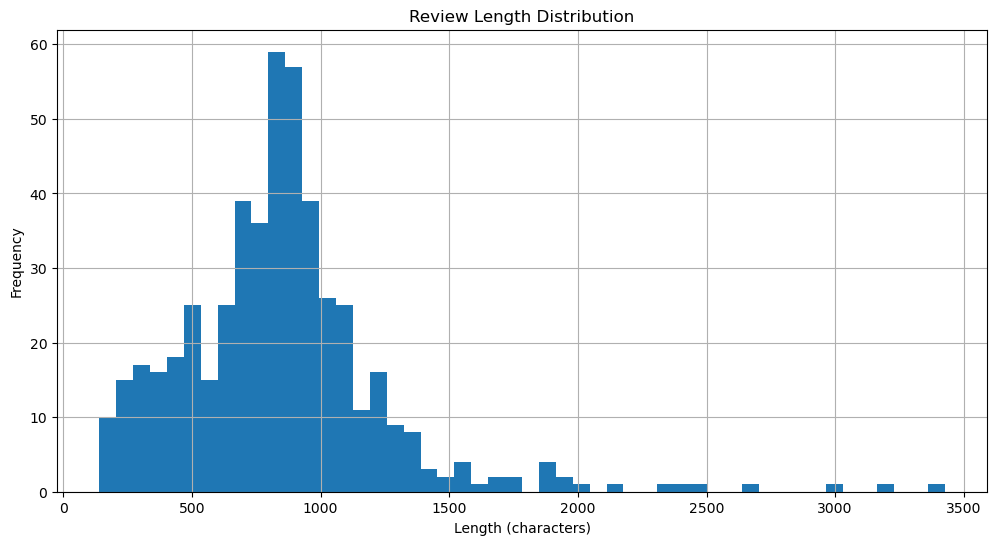

In [13]:
# Visualize review length distribution
df.hist(column='length', bins=50, figsize=(12,6))
plt.title('Review Length Distribution')
plt.xlabel('Length (characters)')
plt.ylabel('Frequency')
plt.show()

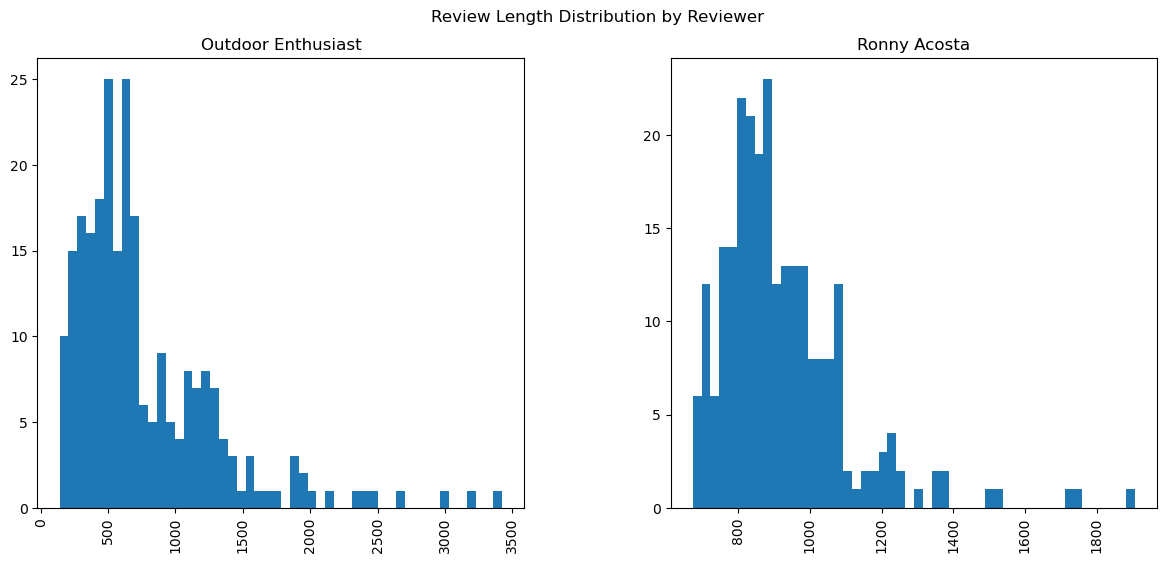

In [14]:
# Visualize review length by reviewer
df.hist(column='length', by='reviewer', bins=50, figsize=(14,6))
plt.suptitle('Review Length Distribution by Reviewer')
plt.show()

In [15]:
df[df["length"] > 2000]

,reviewer,review,length
65,Outdoor Enthusiast,"I am an avid hiker, camper, and wilderness bac...",2395
154,Outdoor Enthusiast,I have been doing DIY projects for more than a...,3183
244,Outdoor Enthusiast,I wanted to get a gazebo/pergola for some time...,2145
249,Outdoor Enthusiast,"I was very, VERY skeptical of these massage gu...",2481
262,Outdoor Enthusiast,It took me a loooong time trying to decide whi...,2639
310,Outdoor Enthusiast,Our studio's business has expanded a bit and w...,3426
346,Outdoor Enthusiast,The Pimax Vision was introduced as a Kickstart...,2980
494,Outdoor Enthusiast,"You might wonder, what is the difference betwe...",2372


As we can see here Outdoor Enthusiast tend to write longer reviews.

In [16]:
#Checking the longest review
print(df[df["length"] == df["length"].max()]["review"].iloc[0])

Our studio's business has expanded a bit and we purchased an additional set. Our original review for the 2-pack is the same as for this 3-pack. I had been a professional photographer since 2008 and retired six years ago to focus on being as good of a father to my children as possible. That did not mean hanging up my cameras. I still use them to photograph my kids as they grew through the years. Towards the end of my photography career, I traded my bulb/umbrella setup for a RGB LED based lighting system instead, primarily for the lighter weight, more compact size, and battery portability. As a bonus, I liked the ability to control the lights via a Bluetooth-connected smartphone app without having to interrupt my shoots with the infant/toddler kids. RGB LED lights allow you to simulate and color-correct certain lighting conditions. From cool daylight (5600 Kelvin) to warm sunsets (3200K) and control over the intensity, hue, and saturation of the lights, the variety of scenes you could us

**--Data Preprocessing and Modeling--**

In [33]:
import re #for numbers
import string #for punctuations
from sklearn.pipeline import Pipeline 
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
import nltk
from nltk.corpus import stopwords

In [34]:
# Download NLTK stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/31ebe8bc-
[nltk_data]     bef4-44ae-a16d-35cc4fcd307e/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
# Define text cleaning function
def text_cleaner(text):
    # Remove numbers
    wo_num = re.sub(r'\w*\d\w*', '', text)
    # Remove punctuation
    wo_num_punc = [char for char in wo_num if char not in string.punctuation]
    wo_num_punc = ''.join(wo_num_punc)
    # Remove stopwords
    wo_num_punc_sw = [word for word in wo_num_punc.split() if word.lower() not in stopwords.words('english')]
    return wo_num_punc_sw

In [36]:
# Create pipeline: Vectorize -> TF-IDF -> Naive Bayes
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_cleaner)),  # Convert text to word counts
    ('tfidf', TfidfTransformer()),  # Weight words by importance
    ('NB Classifier', MultinomialNB())  # Classify with Naive Bayes
])

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
# Split data into train (90%) and test (10%)
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['reviewer'], test_size=0.10, random_state=42)

In [39]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_cleaner at 0x74a7779e8c10>)),
                ('tfidf', TfidfTransformer()),
                ('NB Classifier', MultinomialNB())])

In [40]:
# Predict on test set
predictions = pipeline.predict(X_test)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
# Evaluate model performance
print(classification_report(y_test, predictions))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predictions))

                    precision    recall  f1-score   support

Outdoor Enthusiast       1.00      0.88      0.94        25
      Ronny Acosta       0.89      1.00      0.94        25

          accuracy                           0.94        50
         macro avg       0.95      0.94      0.94        50
      weighted avg       0.95      0.94      0.94        50

Confusion Matrix:
[[22  3]
 [ 0 25]]
